Last updated: 15 Feb 2023

# 🤖 AI Project Using Regression By Ammar Khan 🤖


# 🐍 Installation 🐍


You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

# Setup

In [ ]:
!pip install --use-deprecated=legacy-resolver pycaret[full]

In [ ]:
!pip install ucimlrepo

In [ ]:
#Tested out Retreiving the old way to see the difference of the second way to retrieve the data
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [ ]:
import pandas as pd
file = open('abalone.data', 'r')
df_abalone = pd.read_table(file, sep= ',', names= ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#check the shape of data
df_abalone.shape

(4177, 9)

In [ ]:
#Install this command before retrieving the data:
#pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

#Concat the data
abaloneAgeData = pd.concat([X, y], axis=1)

viewData = abaloneAgeData.head()

viewData

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.2.0'

# 🚀 5 Step Procedure:

## A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:
## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

# Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *

#Setting up the environment
a = setup(abaloneAgeData, target = 'Rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(abaloneAgeData, target = 'Rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5170,4.5702,2.1347,0.5595,0.1721,0.1500,1.7560
gbr,Gradient Boosting Regressor,1.5183,4.6284,2.1489,0.5543,0.1730,0.1504,0.2760
rf,Random Forest Regressor,1.5406,4.7134,2.1688,0.5456,0.1753,0.1529,0.7480
lightgbm,Light Gradient Boosting Machine,1.5532,4.8000,2.1878,0.5382,0.1760,0.1530,0.8920
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.4690
ridge,Ridge Regression,1.5970,4.9139,2.2152,0.5275,0.1836,0.1602,0.0510
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1828,0.1603,0.0470
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1798,0.1525,0.0520
lr,Linear Regression,1.5998,5.0267,2.2391,0.5158,0.1830,0.1603,0.4110
huber,Huber Regressor,1.5654,5.0514,2.2460,0.5144,0.1810,0.1510,0.0750


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5170,4.5702,2.1347,0.5595,0.1721,0.1500,1.6640
gbr,Gradient Boosting Regressor,1.5183,4.6284,2.1489,0.5543,0.1730,0.1504,0.2790
rf,Random Forest Regressor,1.5406,4.7134,2.1688,0.5456,0.1753,0.1529,0.7690
lightgbm,Light Gradient Boosting Machine,1.5532,4.8000,2.1878,0.5382,0.1760,0.1530,0.6250
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.4360
ridge,Ridge Regression,1.5970,4.9139,2.2152,0.5275,0.1836,0.1602,0.0490
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1828,0.1603,0.0470
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1798,0.1525,0.0520
lr,Linear Regression,1.5998,5.0267,2.2391,0.5158,0.1830,0.1603,0.0440
huber,Huber Regressor,1.5654,5.0514,2.2460,0.5144,0.1810,0.1510,0.0760


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

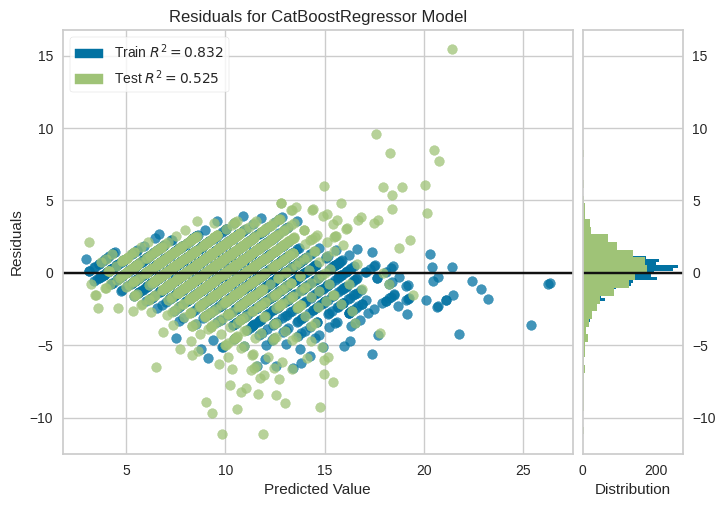

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

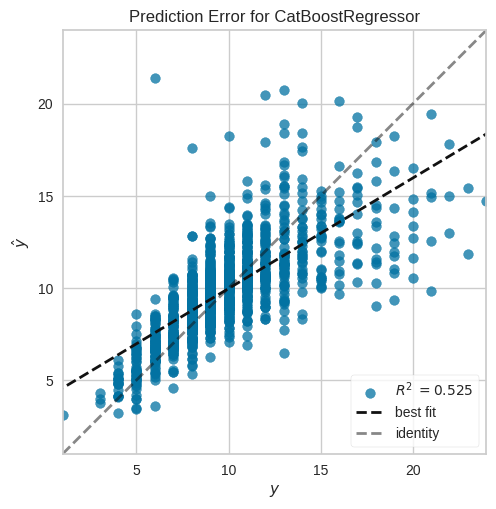

In [ ]:
# plot error
plot_model(best, plot = 'error')

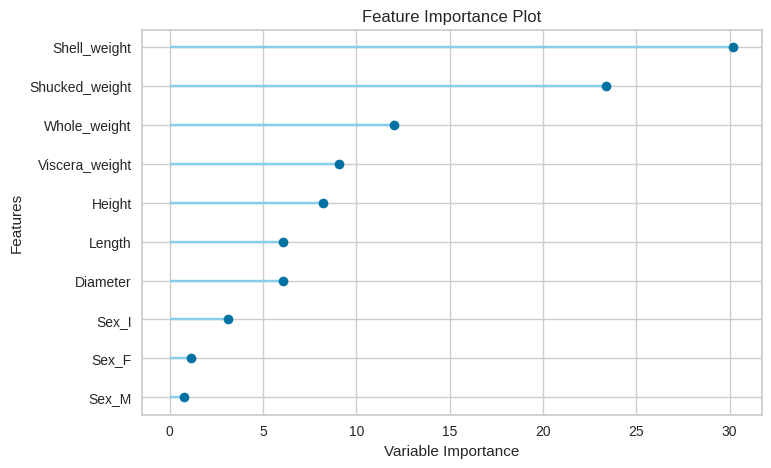

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.5244,4.8480,2.2018,0.5245,0.1773,0.1528


In [ ]:
# show predictions df
holdout_pred.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,prediction_label
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5,5.048807
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,10,9.344533
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,9,8.765838
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,9,13.344065
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14,12.010997


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop charges

new_data = abaloneAgeData.copy()
new_data.drop('Rings', axis=1, inplace=True)
new_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,prediction_label
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,9.852465
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.886630
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.678084
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9.763446
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6.453878


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  <catboost.core.CatBoostRegre

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7887d6660dc0>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [ ]:
s = setup(abaloneAgeData, target = 'Rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Sex_I,Sex_M,Sex_F,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
112,1.0,0.0,0.0,0.435,0.320,0.080,0.3325,0.1485,0.0635,0.1050
2979,0.0,1.0,0.0,0.490,0.355,0.155,0.9810,0.4650,0.2015,0.2505
1715,0.0,1.0,0.0,0.645,0.485,0.150,1.2215,0.5695,0.2735,0.3300
3548,0.0,0.0,1.0,0.495,0.370,0.120,0.5940,0.2800,0.1100,0.1375
3911,1.0,0.0,0.0,0.355,0.270,0.100,0.2160,0.0830,0.0370,0.0750
...,...,...,...,...,...,...,...,...,...,...
1593,1.0,0.0,0.0,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
4060,1.0,0.0,0.0,0.545,0.405,0.130,0.6580,0.3270,0.1445,0.1740
1346,0.0,1.0,0.0,0.585,0.450,0.180,0.7995,0.3360,0.1855,0.2370
3454,0.0,0.0,1.0,0.575,0.460,0.165,1.0650,0.4985,0.2145,0.2815


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# init setup with normalize = True
s = setup(abaloneAgeData, target = 'Rings', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


<AxesSubplot: >

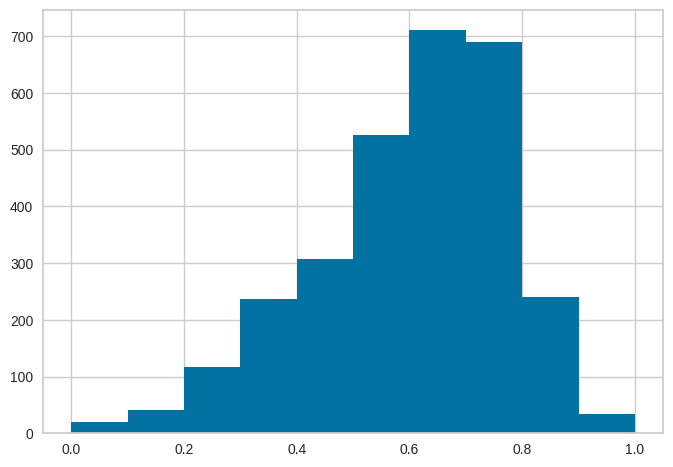

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Length'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<AxesSubplot: >

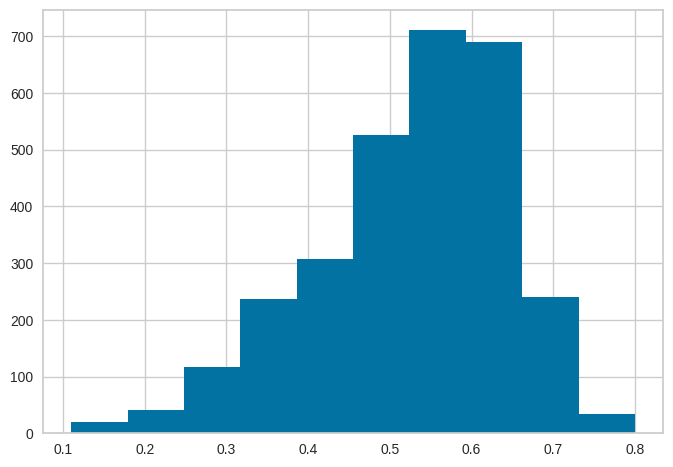

In [ ]:
get_config('X_train')['Length'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,1.6850
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.2840
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,0.7310
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.7610
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.4850
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1829,0.1603,0.0730
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1828,0.1602,0.0500
huber,Huber Regressor,1.5651,5.0503,2.2457,0.5145,0.1810,0.1509,0.0810
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1829,0.1610,0.0500
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.1200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,1.6890
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.2800
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,0.8480
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.7850
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.4020
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.1220
dt,Decision Tree Regressor,2.0780,9.2831,3.0405,0.1001,0.2397,0.2034,0.0590


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,1.689
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.280
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,0.848
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.785
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.402
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.122
dt,Decision Tree Regressor,2.0780,9.2831,3.0405,0.1001,0.2397,0.2034,0.059


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [ ]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,1.8040
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.2840
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,0.7380
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.2850
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.4210
huber,Huber Regressor,1.5651,5.0503,2.2457,0.5145,0.1810,0.1509,0.0810
knn,K Neighbors Regressor,1.5938,5.2118,2.2821,0.4974,0.1835,0.1550,0.0820
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1829,0.1603,0.0510
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1828,0.1602,0.0510
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.1200


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by MAE
best_mae_models_top3

 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.regression import *
s = setup(abaloneAgeData, target = 'Rings', log_experiment='mlflow', experiment_name='abalone_experiment')

,Description,Value
0,Session id,6078
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [ ]:
# compare models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.5174,4.5156,2.1202,0.5516,0.1740,0.1524,0.6950
catboost,CatBoost Regressor,1.5144,4.5524,2.1264,0.5489,0.1731,0.1511,1.7770
gbr,Gradient Boosting Regressor,1.5124,4.5628,2.1294,0.5477,0.1737,0.1516,0.2790
lightgbm,Light Gradient Boosting Machine,1.5275,4.5965,2.1389,0.5431,0.1750,0.1527,1.2770
et,Extra Trees Regressor,1.5425,4.6411,2.1507,0.5386,0.1762,0.1550,0.5140
ridge,Ridge Regression,1.5841,4.8110,2.1872,0.5225,0.1838,0.1611,0.0440
br,Bayesian Ridge,1.5839,4.8965,2.2034,0.5140,0.1821,0.1610,0.0670
lr,Linear Regression,1.5841,4.9174,2.2073,0.5119,0.1820,0.1609,0.0450
huber,Huber Regressor,1.5503,4.9607,2.2178,0.5085,0.1811,0.1516,0.0740
xgboost,Extreme Gradient Boosting,1.6100,5.0631,2.2449,0.4966,0.1846,0.1616,0.1160


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# start mlflow server on localhost:5000
!mlflow ui

[2023-12-02 08:38:02 +0000] [55995] [INFO] Starting gunicorn 20.1.0
[2023-12-02 08:38:02 +0000] [55995] [INFO] Listening at: http://127.0.0.1:5000 (55995)
[2023-12-02 08:38:02 +0000] [55995] [INFO] Using worker: sync
[2023-12-02 08:38:02 +0000] [55996] [INFO] Booting worker with pid: 55996
[2023-12-02 08:38:07 +0000] [55995] [INFO] Handling signal: int

Aborted!
[2023-12-02 08:38:08 +0000] [55996] [INFO] Worker exiting (pid: 55996)
[2023-12-02 08:38:08 +0000] [55995] [INFO] Shutting down: Master


By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4473,3.5809,1.8923,0.5822,0.1610,0.1498
1,1.7551,5.6448,2.3759,0.4242,0.2102,0.1871
2,1.8417,7.2384,2.6904,0.3009,0.2116,0.1878
3,1.5457,4.7196,2.1725,0.5108,0.1801,0.1540
4,1.5256,4.5550,2.1342,0.5326,0.1827,0.1629
5,1.5781,4.7997,2.1908,0.5648,0.1746,0.1497
6,1.5744,5.1169,2.2621,0.5636,0.1818,0.1519
7,1.5037,4.1142,2.0284,0.5359,0.1755,0.1551
8,1.4407,4.0476,2.0119,0.5807,0.1641,0.1541


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4473,3.5809,1.8923,0.5822,0.1610,0.1498
1,1.7551,5.6448,2.3759,0.4242,0.2102,0.1871
2,1.8417,7.2384,2.6904,0.3009,0.2116,0.1878
3,1.5457,4.7196,2.1725,0.5108,0.1801,0.1540
4,1.5256,4.5550,2.1342,0.5326,0.1827,0.1629
5,1.5781,4.7997,2.1908,0.5648,0.1746,0.1497
6,1.5744,5.1169,2.2621,0.5636,0.1818,0.1519
7,1.5037,4.1142,2.0284,0.5359,0.1755,0.1551
8,1.4407,4.0476,2.0119,0.5807,0.1641,0.1541


In [ ]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6715,5.4243,2.3290,0.4435,0.1944,0.1722
1,1.5670,4.8554,2.2035,0.5381,0.1808,0.1573
2,1.5214,4.5060,2.1227,0.5527,0.1734,0.1536
Mean,1.5866,4.9286,2.2184,0.5114,0.1829,0.1610
Std,0.0629,0.3785,0.0849,0.0484,0.0087,0.0080


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4517,3.5758,1.8910,0.5828,0.1621,0.1516
1,1.7534,5.6374,2.3743,0.4250,0.2099,0.1868
2,1.8420,7.2389,2.6905,0.3009,0.2116,0.1879
3,1.5458,4.7163,2.1717,0.5111,0.1802,0.1542
4,1.5254,4.5551,2.1343,0.5326,0.1826,0.1628
5,1.5780,4.7998,2.1908,0.5648,0.1746,0.1497
6,1.5744,5.1179,2.2623,0.5635,0.1818,0.1519
7,1.5047,4.1163,2.0289,0.5356,0.1756,0.1552
8,1.4412,4.0513,2.0128,0.5803,0.1641,0.1540


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0171,7.9147,2.8133,0.0765,0.2282,0.2010
1,2.2969,10.7065,3.2721,-0.0921,0.2658,0.2386
2,2.1195,9.3549,3.0586,0.0965,0.2488,0.2119
3,2.1062,8.7089,2.9511,0.0973,0.2415,0.2072
4,1.8664,6.5856,2.5662,0.3242,0.2191,0.1927
5,2.3630,10.9932,3.3156,0.0033,0.2605,0.2240
6,2.1199,9.0651,3.0108,0.2269,0.2470,0.2143
7,1.9863,7.1712,2.6779,0.1910,0.2277,0.1983
8,1.9178,7.9863,2.8260,0.1726,0.2287,0.1988


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5746,4.5657,2.1368,0.4673,0.1850,0.1665
1,1.8427,6.1762,2.4852,0.3700,0.2159,0.1986
2,1.9405,6.6751,2.5836,0.3553,0.2168,0.1928
3,1.6957,5.7941,2.4071,0.3994,0.2005,0.1697
4,1.6941,5.9909,2.4476,0.3852,0.2077,0.1819
5,1.7907,6.2988,2.5097,0.4289,0.1979,0.1669
6,1.7334,5.9545,2.4402,0.4922,0.1918,0.1671
7,1.6311,4.5242,2.1270,0.4896,0.1839,0.1685
8,1.4534,3.9262,1.9815,0.5932,0.1670,0.1519


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [ ]:
dt

DecisionTreeRegressor(random_state=6078)

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4450,4.0453,2.0113,0.5280,0.1664,0.1477
1,1.7320,5.8740,2.4236,0.4008,0.2009,0.1776
2,1.7304,5.8077,2.4099,0.4391,0.2022,0.1735
3,1.5464,5.2991,2.3020,0.4507,0.1841,0.1516
4,1.6126,5.3289,2.3084,0.4531,0.1933,0.1666
5,1.6291,5.3484,2.3127,0.5151,0.1806,0.1527
6,1.6295,5.7528,2.3985,0.5094,0.1895,0.1587
7,1.4890,4.1770,2.0438,0.5288,0.1695,0.1484
8,1.4180,4.0730,2.0182,0.5780,0.1647,0.1456


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5746,4.5657,2.1368,0.4673,0.1850,0.1665
1,1.8427,6.1762,2.4852,0.3700,0.2159,0.1986
2,1.9405,6.6751,2.5836,0.3553,0.2168,0.1928
3,1.6957,5.7941,2.4071,0.3994,0.2005,0.1697
4,1.6941,5.9909,2.4476,0.3852,0.2077,0.1819
5,1.7907,6.2988,2.5097,0.4289,0.1979,0.1669
6,1.7334,5.9545,2.4402,0.4922,0.1918,0.1671
7,1.6311,4.5242,2.1270,0.4896,0.1839,0.1685
8,1.4534,3.9262,1.9815,0.5932,0.1670,0.1519


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# model object
tuned_dt

DecisionTreeRegressor(max_depth=5, max_features=1.0, min_impurity_decrease=0.1,
                      min_samples_leaf=3, min_samples_split=5,
                      random_state=6078)

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'Whole_weight',
                                                                          'Shucked_weight',
                                                                          'Viscera_weight',
                                                                          'Shell_weight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=6078, refit=False, scoring='r2', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4843,4.1184,2.0294,0.5195,0.1780,0.1555
1,1.8056,6.3508,2.5201,0.3522,0.2107,0.1872
2,1.7907,6.0940,2.4686,0.4115,0.2069,0.1806
3,1.6965,5.9180,2.4327,0.3866,0.1979,0.1661
4,1.7143,5.8882,2.4266,0.3958,0.2013,0.1773
5,1.7163,5.8551,2.4197,0.4692,0.1919,0.1624
6,1.7031,6.1110,2.4720,0.4789,0.1990,0.1654
7,1.7332,5.8739,2.4236,0.3373,0.2006,0.1716
8,1.5221,4.3812,2.0931,0.5461,0.1757,0.1581


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-12-02 06:38:39,205] Searching the best hyperparameters using 2923 samples...
[I 2023-12-02 06:38:48,312] Finished hyperparameter search!


## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4481,4.0176,2.0044,0.5312,0.1687,0.1484
1,1.7089,5.4166,2.3274,0.4475,0.1994,0.1808
2,1.6983,5.4883,2.3427,0.4700,0.1971,0.1714
3,1.5671,5.1277,2.2645,0.4685,0.1845,0.1549
4,1.5449,5.0056,2.2373,0.4863,0.1857,0.1585
5,1.7014,5.5173,2.3489,0.4998,0.1843,0.1595
6,1.6106,4.9155,2.2171,0.5808,0.1784,0.1588
7,1.4462,3.9235,1.9808,0.5574,0.1685,0.1479
8,1.4503,4.4561,2.1110,0.5383,0.1704,0.1483


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=6078),
                 random_state=6078)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3720,4.0410,2.0102,0.5285,0.1698,0.1387
1,1.8157,6.2867,2.5073,0.3588,0.2124,0.1881
2,1.6177,5.5973,2.3659,0.4594,0.2023,0.1629
3,1.6610,5.6062,2.3677,0.4189,0.1938,0.1600
4,1.6096,6.0000,2.4495,0.3843,0.2035,0.1658
5,1.6986,6.0000,2.4495,0.4560,0.1924,0.1575
6,1.7705,6.5582,2.5609,0.4407,0.1994,0.1688
7,1.5411,4.6096,2.1470,0.4800,0.1850,0.1545
8,1.4829,4.6404,2.1542,0.5192,0.1837,0.1541


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=6078),
                  n_estimators=10, random_state=6078)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# top 3 models based on mae
best_mae_models_top3

 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

In [ ]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3244,3.3320,1.8254,0.6112,0.1549,0.1376
1,1.6423,5.0404,2.2451,0.4859,0.1898,0.1718
2,1.5813,5.0049,2.2372,0.5166,0.1875,0.1595
3,1.4697,4.5519,2.1335,0.5282,0.1726,0.1433
4,1.4687,4.4275,2.1042,0.5456,0.1756,0.1527
5,1.5988,4.9321,2.2208,0.5528,0.1725,0.1501
6,1.4983,4.6075,2.1465,0.6071,0.1673,0.1444
7,1.3970,3.5772,1.8913,0.5964,0.1597,0.1418
8,1.3545,3.6202,1.9027,0.6249,0.1566,0.1413


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7887b78283d0>),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123))],
                n_jobs=-1)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3399,3.2752,1.8098,0.6178,0.1546,0.1397
1,1.6745,5.1643,2.2725,0.4732,0.1969,0.1760
2,1.6507,5.2962,2.3013,0.4885,0.1917,0.1673
3,1.4664,4.3265,2.0800,0.5515,0.1704,0.1452
4,1.4506,4.2321,2.0572,0.5657,0.1738,0.1523
5,1.5378,4.4506,2.1096,0.5965,0.1657,0.1451
6,1.5140,4.6501,2.1564,0.6034,0.1693,0.1459
7,1.3926,3.5726,1.8901,0.5970,0.1612,0.1427
8,1.3603,3.6854,1.9197,0.6182,0.1712,0.1430


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7887b782a710>),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

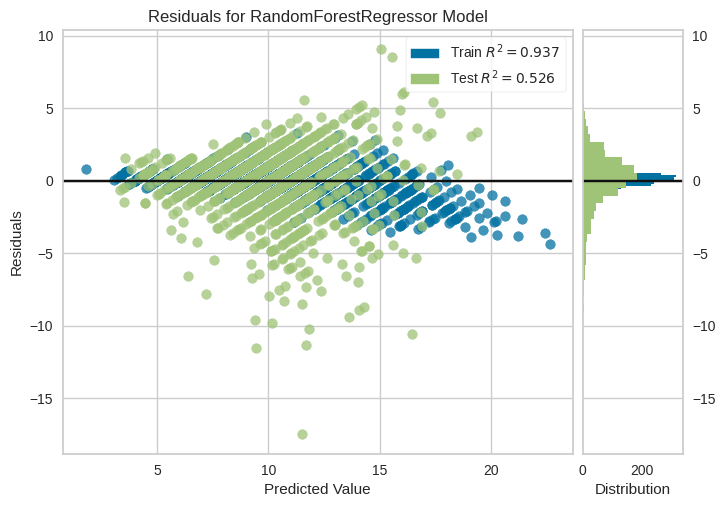

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

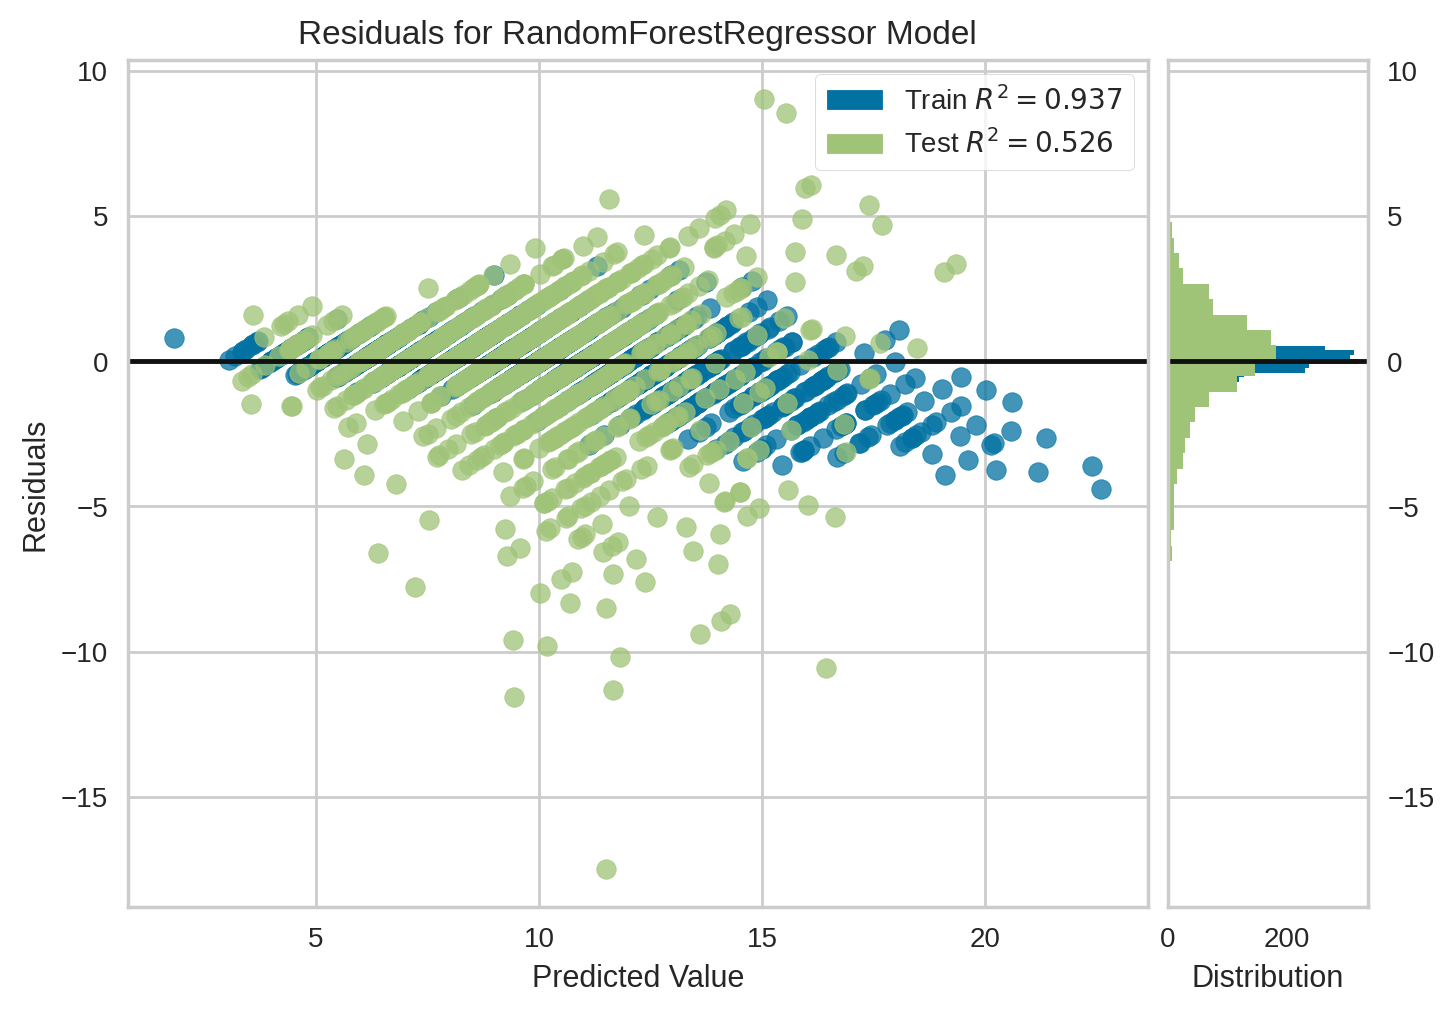

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3874,3.6502,1.9105,0.5741,0.1617,0.1429
1,1.6910,5.2844,2.2988,0.4610,0.1961,0.1785
2,1.5822,5.0330,2.2434,0.5139,0.1887,0.1592
3,1.5239,4.7768,2.1856,0.5049,0.1772,0.1486
4,1.5236,4.7070,2.1696,0.5170,0.1802,0.1573
5,1.5696,4.9482,2.2245,0.5514,0.1733,0.1463
6,1.5056,4.4938,2.1199,0.6168,0.1672,0.1452
7,1.4192,3.6971,1.9228,0.5829,0.1631,0.1439
8,1.4039,3.8788,1.9695,0.5982,0.1617,0.1447


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

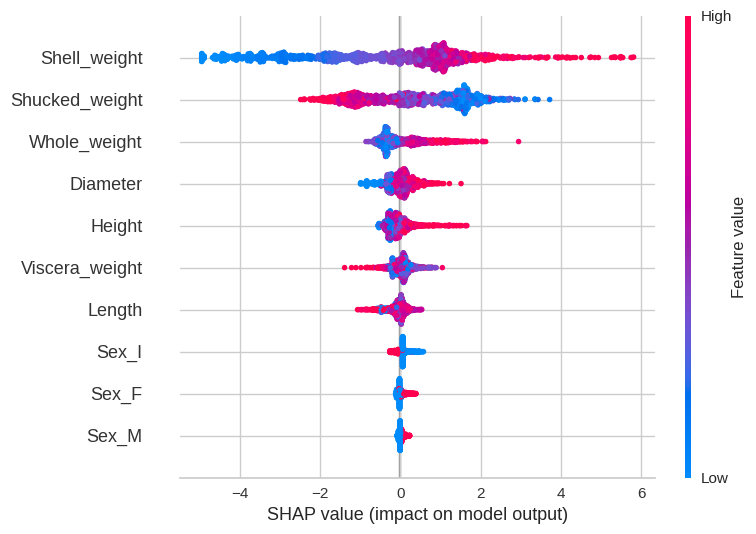

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/39 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.5841,4.9174,2.2073,0.5119,0.1820,0.1609
1,Lasso Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.3347,10.1231,3.1780,-0.0059,0.2860,0.2657
2,Ridge Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.5841,4.8110,2.1872,0.5225,0.1838,0.1611
3,Elastic Net,"(TransformerWrapper(include=['Length', 'Diamet...",2.2179,9.2672,3.0401,0.0798,0.2721,0.2503
4,Least Angle Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.8895,7.5565,2.7393,0.2464,0.2388,0.1866
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.3347,10.1231,3.1780,-0.0059,0.2860,0.2657
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['Length', 'Diamet...",1.9697,7.1627,2.6706,0.2896,0.2253,0.2042
7,Bayesian Ridge,"(TransformerWrapper(include=['Length', 'Diamet...",1.5839,4.8965,2.2034,0.5140,0.1821,0.1610
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",2.1528,7.8810,2.7641,0.2246,0.2531,0.2250


In [ ]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 T...
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ['trained_model',
                 VotingRegressor(estimators=[('CatBoost Regressor',
                                              <catboost.core.CatBoostRegressor object at 0x788701c7a710>),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(random_state=123)),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=123))],
                                 n_jobs=-1)]])

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x788701c67ee0>),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
#had to import this library in order to implement API because fastAPI wasn't installing.
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
adagio                           0.2.4
aiofiles                         23.2.1
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
alembic                          1.13.0
altair                           4.2.2
ansi2html                        1.8.0
antlr4-python3-runtime           4.11.1
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
a

In [ ]:
import sys
!{sys.executable} -m pip install fastapi

In [ ]:
!{sys.executable} -m pip install --upgrade pycaret

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fugue 0.8.7 requires triad>=0.9.3, but you have triad 0.9.1 which is incompatible.
ydata-profiling 4.6.2 requires pydantic>=2, but you have pydantic 1.10.13 which is incompatible.


In [ ]:
#installed fastapi successfully
pip install fastapi uvicorn

In [ ]:
#Had to run some tests in order to keep checking if fastapi was installed or not
try:
    import fastapi
    print("FastAPI is installed and working.")
except ImportError as e:
    print("FastAPI is not installed or there is an issue with the installation.")

FastAPI is installed and working.


In [ ]:
!pip show pycaret

Name: pycaret
Version: 3.2.0
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [ ]:
# create api
create_api(best, api_name = 'my_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_api.py


In [ ]:
#Successfully ran my API
!python my_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [30128]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [30128]


In [ ]:
# check out the .py file created with this magic command
%load my_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
%load my_api

In [ ]:
# check out the requirements file created with this magic command
%load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 RandomForestRegressor(n_jobs=-1, random_state=6078))])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[9] <= 0.16825000196695328) {
            if (input[9] <= 0.05874999985098839) {
                if (input[6] <= 0.09724999964237213) {
                    if (input[9] <= 0.007250000024214387) {
                        if (input[4] <= 0.07250000163912773) {
                            var0 = 1.0;
                        } else {
                            if (input[9] <= 0.004500000039115548) {
                                var0 = 3.0;
                            } else {
                                if (input[5] <= 0.03249999973922968) {
                                    if (input[5] <= 0.022499999962747097) {
                                        var0 = 4.0;
                                    } else {
                                        var0 = 3.0;
                                    }
                                } else {
                                    

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  RandomForestRegressor(n_jobs

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=6078))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=abaloneAgeData)

,Description,Value
0,Session id,3382
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True
